# MNIST ( Hello world in ML world )

## Getting data 

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", cache=True)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [2]:
X, y = mnist.data, mnist.target

### Show An Image

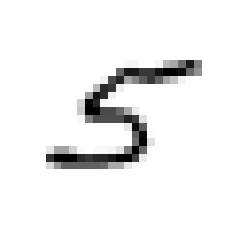

'5'

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
def show_digit_image(digit):
    digit_img = digit.reshape(28, 28)
    plt.imshow(digit_img, cmap=matplotlib.cm.binary)
    plt.axis("off")
    plt.show()
digit = X[3007]
show_digit_image(digit)
y[3007]

## Get Train and Test Sets

In [4]:
# from sklearn.model_selection import train_test_split
# X_train, X_test = train_test_split(X, test_size=0.1428571, random_state=42, shuffle=True) # 1000 and 6000 data
# y_train, y_test = train_test_split(y, test_size=0.1428571, random_state=42, shuffle=True)
import numpy as np
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Start Just from 5

In [5]:

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [6]:
SGDClassifier?

Object `SGDClassifier` not found.


In [7]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42,n_jobs=-1)
sgd.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
sgd.predict([digit])

array([ True])

**NOTE** : When I test this sets as int 32 or int 8 types it didn't work with this model!

## Checking Cross-Validation with `Accuracy` Method

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

In [10]:
scores

array([0.9673 , 0.96655, 0.9517 ])

### But Wait!

In [11]:
from sklearn.base import BaseEstimator
class DumbClassifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
        

In [12]:
dumb_model = DumbClassifier()
cross_val_score(dumb_model, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9091 , 0.91115, 0.9087 ])

You see we have over 90% accuracy here :D

## Now Lets Check `Confusion Matrix`

In [13]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54225,   354],
       [ 1935,  3486]])

Each row represent an **actual** class and each column represent a **predicted** class.

| TN | FP |
|----|----|
| FN | TP |

## Recall and Precision

In [15]:
from sklearn.metrics import recall_score, precision_score
recall = recall_score(y_train_5, y_train_pred)
precision = precision_score(y_train_5, y_train_pred)

In [16]:
recall

0.643054786939679

In [17]:
precision

0.9078125

### What about F1 ?

In [18]:
from sklearn.metrics import f1_score
f1 = f1_score(y_train_5, y_train_pred)
f1

0.7528344671201814

In fact F1 is a kind of cross function and set more weight to low value. It depends on question to select recall or precision. And if both of them are important you can use f1 harmunic mean value.

**Precision/Recall Trade Off** : Increasing precision reduce recall.

### Seeing trade of between Precision and Recall

In [19]:
y_score = sgd.decision_function([digit])

In [20]:
y_score

array([3338.58725439])

In [21]:
threshold = 0 # default threshold in SGDClassifier
y_digit_prediction = (y_score > threshold)
y_digit_prediction

array([ True])

In [22]:
y_score = cross_val_predict(sgd, X_train, y_train_5, cv=3, method="decision_function")

In [23]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_train_5, y_score)

In [24]:
def show_plot_precision_recall(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "r-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.show()

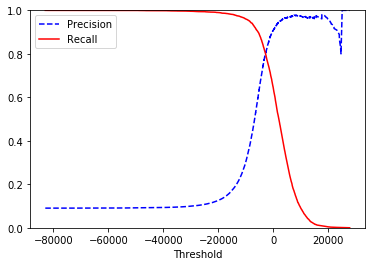

In [25]:
show_plot_precision_recall(precision, recall, thresholds)

In [26]:
def show_plot_precision_aganist_recall(precision, recall):
    plt.plot(recall, precision)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

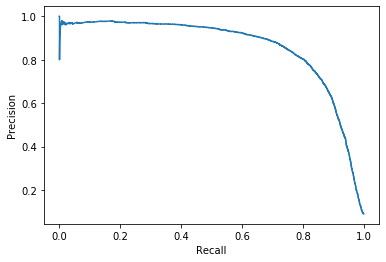

In [27]:
show_plot_precision_aganist_recall(precision, recall)

In [28]:
y_train_pred_90 = (y_score > 3000)
precision_score(y_train_5, y_train_pred_90)

0.9543788187372709

In [29]:
recall_score(y_train_5, y_train_pred_90)

0.43220807969009406

When precision is good and recall not it doesn't means that this classifier is good clasifier.

## The ROC Curve

In [30]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_score)

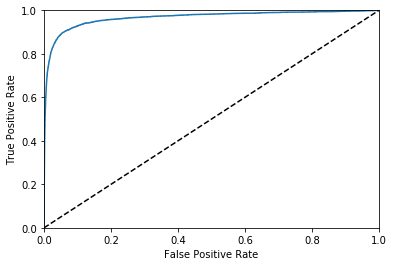

In [31]:
def show_fpr_tpr(fpr, tpr):
    plt.plot(fpr, tpr)
    plt.xlabel("False Positive Rate")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.ylabel("True Positive Rate")
    plt.show()
show_fpr_tpr(fpr, tpr)

In [32]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_score)

0.9665805698590858

## Let use Random Forest


In [34]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier(random_state=42)
y_probs_forest = cross_val_predict(forest_model, X_train, y_train_5, cv=3, method="predict_proba", n_jobs=-1)

In [36]:
y_probs_forest[:, -1]


array([0. , 0.3, 0. , ..., 0. , 0. , 0.1])